# Download Google stock price using pandas convenience methods

In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

goog = web.DataReader(name='GOOG', data_source='google',
                     start='3/14/2007', end=datetime.datetime.now())
print(goog.tail())

              Open    High     Low   Close   Volume
﻿Date                                              
2015-11-19  738.74  742.00  737.43  738.41  1327879
2015-11-20  746.53  757.92  743.00  756.60  2213284
2015-11-23  757.45  762.71  751.82  755.98  1415385
2015-11-24  752.00  755.28  737.63  748.28  2334197
2015-11-25  748.14  752.00  746.06  748.15  1122224


# Calculate Volatility via rolling standard deviation of the log returns and append to DataFrame

In [2]:
"""google is pd.DataFrame"""
goog['log_return'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['volatility'] = pd.rolling_std(goog['log_return'], window=252) * np.sqrt(252)

# Plot stock price data and results


              Open    High     Low   Close   Volume  log_return  volatility
﻿Date                                                                      
2015-11-19  738.74  742.00  737.43  738.41  1327879   -0.002151    0.287797
2015-11-20  746.53  757.92  743.00  756.60  2213284    0.024335    0.288685
2015-11-23  757.45  762.71  751.82  755.98  1415385   -0.000820    0.288677
2015-11-24  752.00  755.28  737.63  748.28  2334197   -0.010238    0.288468
2015-11-25  748.14  752.00  746.06  748.15  1122224   -0.000174    0.288443


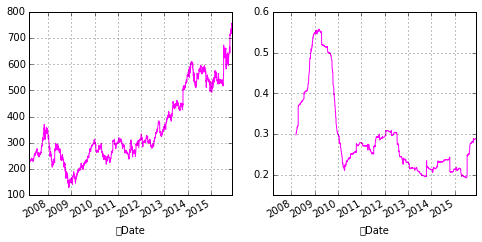

In [3]:
print(goog.tail())
plt.figure(1)
plt.subplot(2,2,1)
goog['Close'].plot(figsize=(8,8), color='magenta')
plt.subplot(2,2,2)
goog['volatility'].plot(figsize=(8,8), color='magenta')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ab06208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ab85a20>], dtype=object)

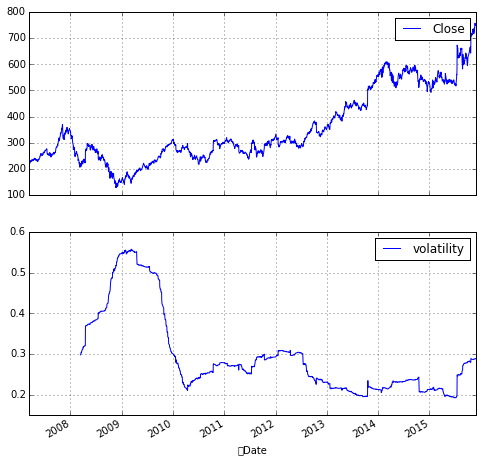

In [4]:
"""Plotting via pandas convienience method, neat"""
goog[['Close', 'volatility']].plot(subplots=True, color='blue', figsize=(8,8))